Predictive model with linear regression and binary classification 

0. Introduction
- Linear regression (when you want to predict a number).
- Binary classification (when you want to predict a yes or no).

The dataset is called winequalityN from Kaggle

Goal 

Use these machine learning tools to predict   the continuous variable quality with a linear regression and predict the type (red/white) of wine with a logistic regression.

1. Initialization and preparation of data

1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.2 ⏳ Loading and preprocessing the dataset 

In [2]:
df = pd.read_csv('winequalityN.csv')


1.3 🧹 Descriptive Analysis

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Dimensions 
df.shape

(6497, 13)

In [5]:
# Columns 
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
# Check out null values 
df.isnull().mean()*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [8]:
# Check for duplicates
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool>

2. 🔍 Exploratory Data analysis

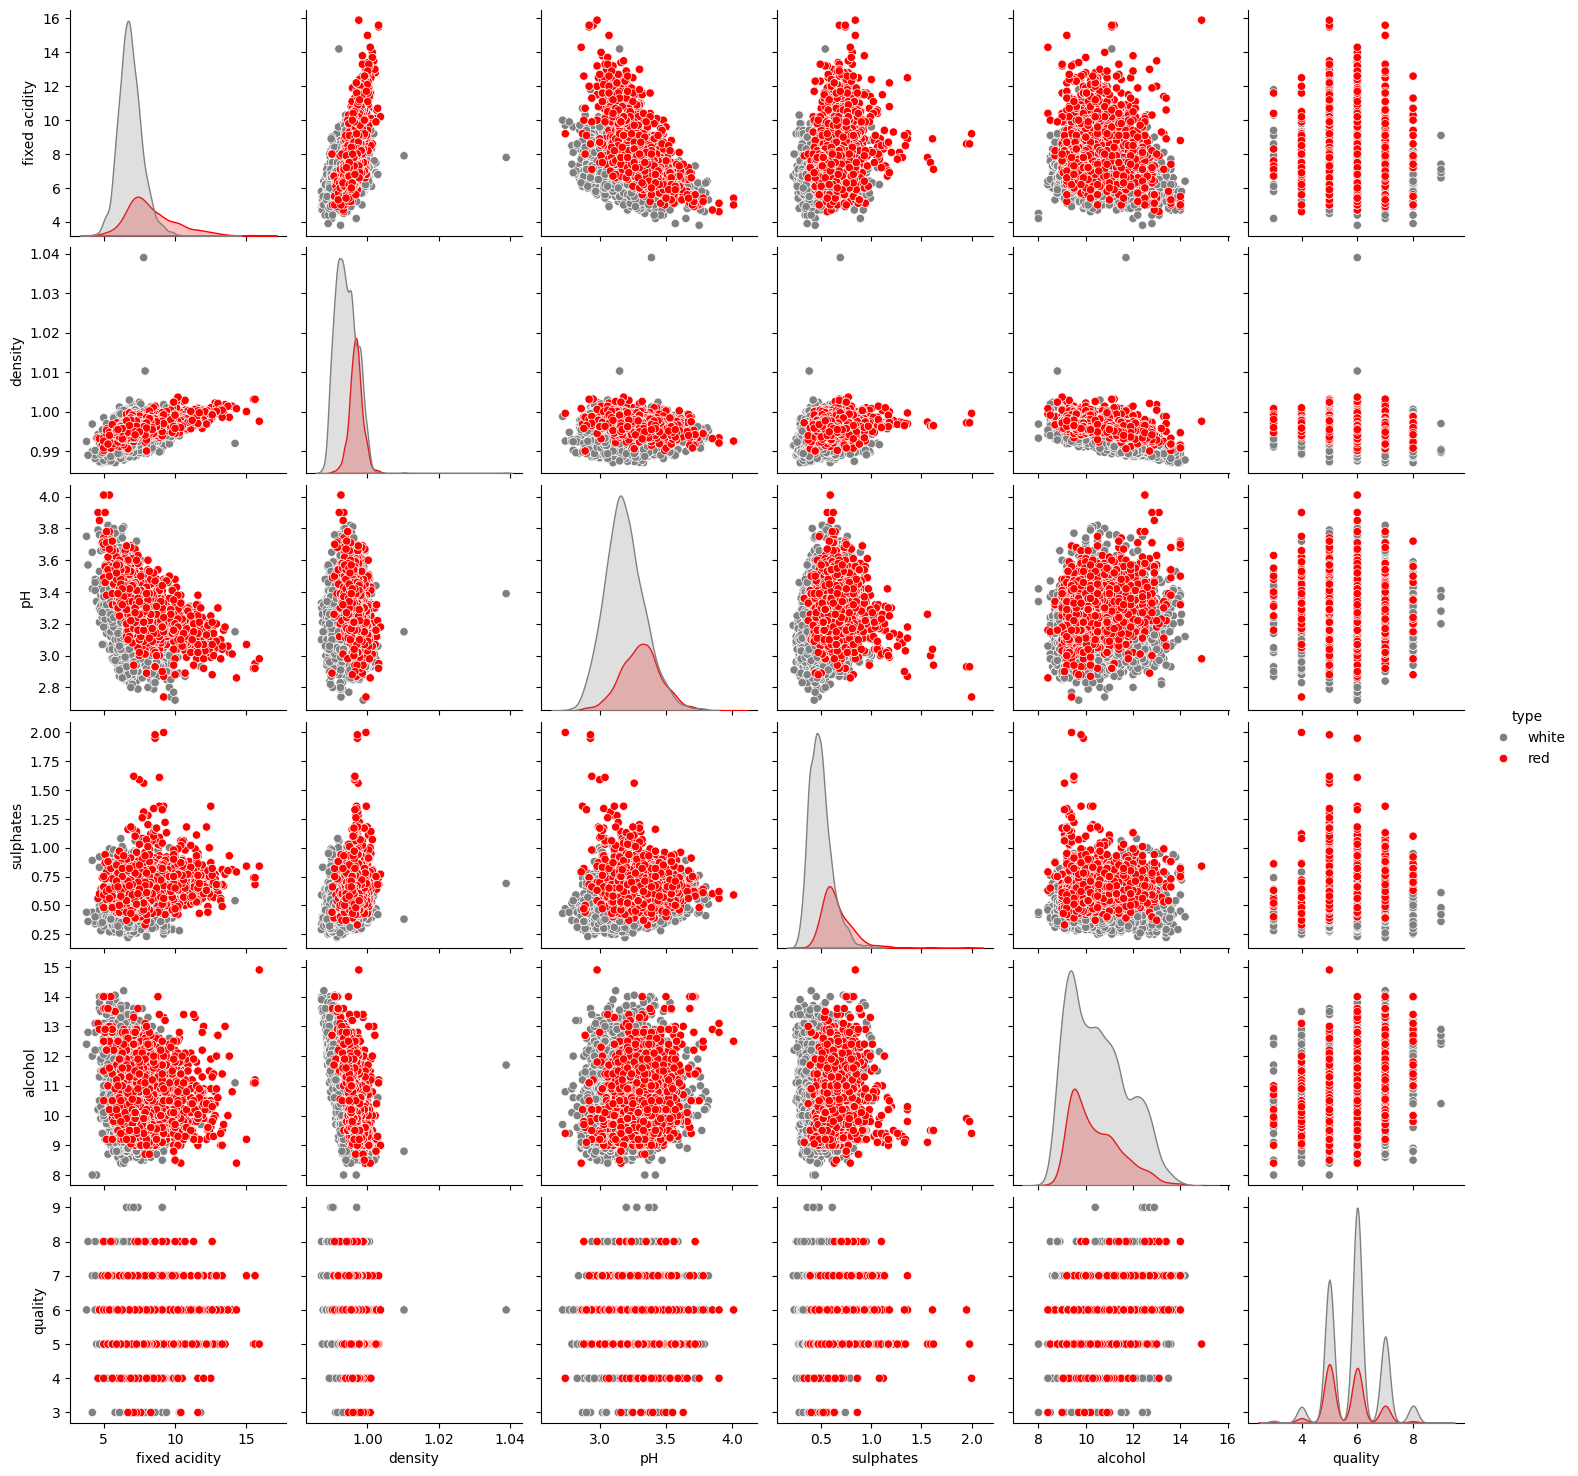

In [9]:
# We customized the palette to make it more intuitive.
custom_palette = {
    "white": "grey",
    "red": "red"
}

# Pairplot:
sns.pairplot(df[['type', 'fixed acidity', 'density', 'pH', 'sulphates', 'alcohol','quality']], hue='type', palette= custom_palette)

2.1 We see that there are variables such as fixed acidity or pH that seem to have a certain predictive capacity when it comes to differentiating between white and red wine. With regard to the quality variable, the variables we have do not seem to have a great predictive capacity.

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11020\2279252000.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quality'])


<Axes: xlabel='quality', ylabel='Density'>

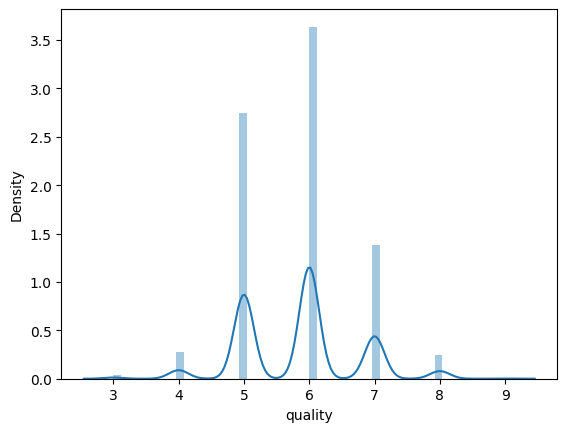

In [10]:
# Check the continue variable 
sns.distplot(df['quality'])

<Axes: >

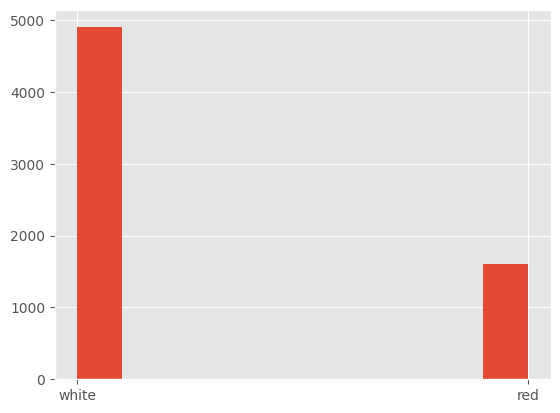

In [11]:
# Check 
plt.style.use('ggplot')
(df['type']).hist()

In [12]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

We see that the categorical response is unbalanced (~75% white vs. ~25% red). In practice, it might be interesting to apply cost-sensitive techniques or balance the dataset in some way if the imbalance is very extreme.

3. ✅ Correlation analysis

<Axes: >

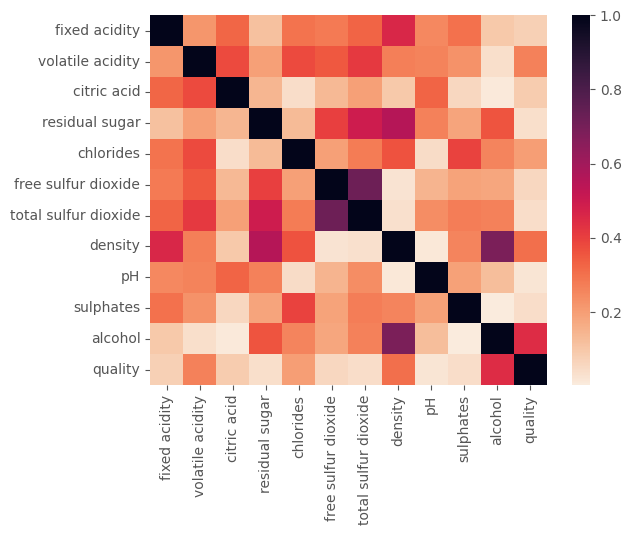

In [13]:
sns.heatmap(abs(df.iloc[:,1:].corr()), cmap= "rocket_r")

3.1 🛠️ Data Engineering
We will evaluate the presence of outliers and observations that could cause our models to malfunction if these variables or observations are not eliminated.

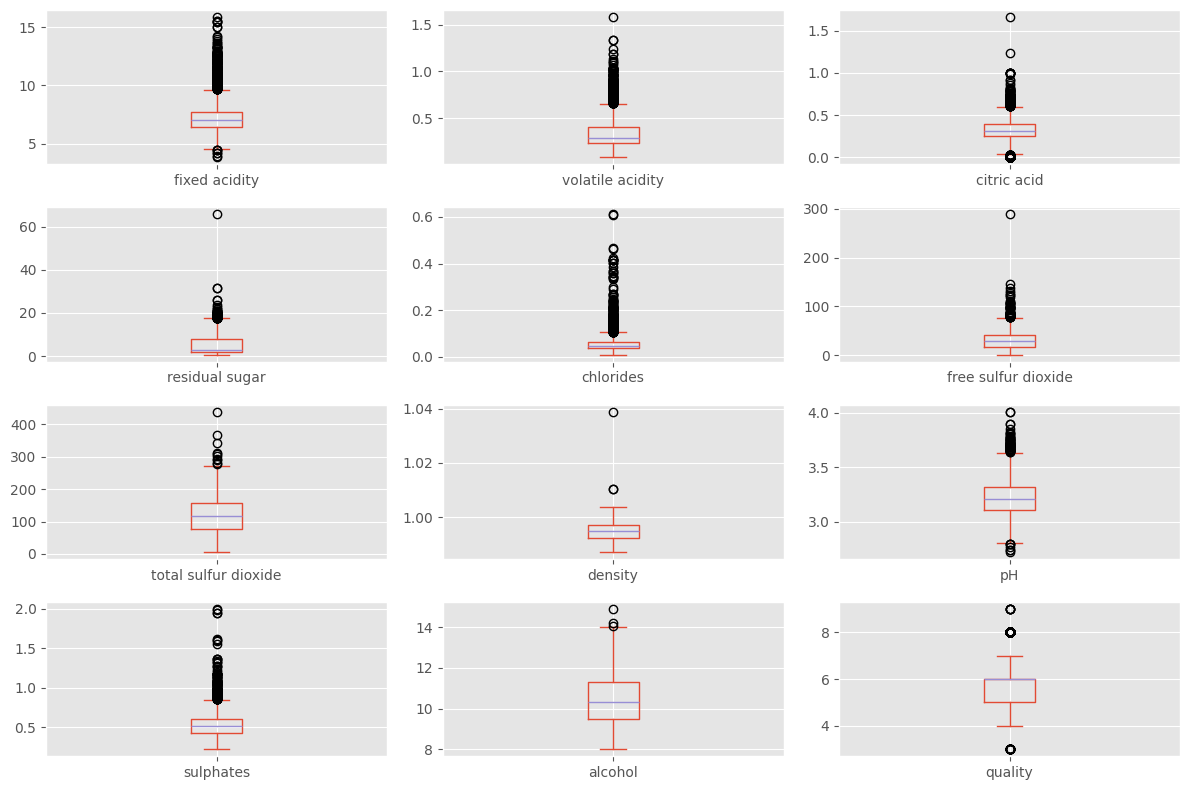

In [14]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

3.2 One of the most commonly used techniques for detecting and eliminating outliers is to consider the interquartile range. This is the difference between the third quartile (Q3) and the first quartile (Q1). If an observation falls outside these ranges, we consider it to be an outlier:

Q1 − 1.5×IQR
Q3 + 1.5×IQR

In [15]:
# List of observations that are outliers in any of the covariates
mask = pd.Series(True, index=df.index)

for col in df.columns[1:]:
    # Cuartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Interquartile range
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update mask: True only if the value is within the limits
    mask &= df[col].between(lower_bound, upper_bound)

# Original observations
print(f"Number of original rows: {len(df)}")

# We apply a mask to remove rows with at least one outlier
df = df[mask]

# Result after removing outliers
print(f"Number of rows without outliers: {len(df)}")


Number of original rows: 6497
Number of rows without outliers: 4815


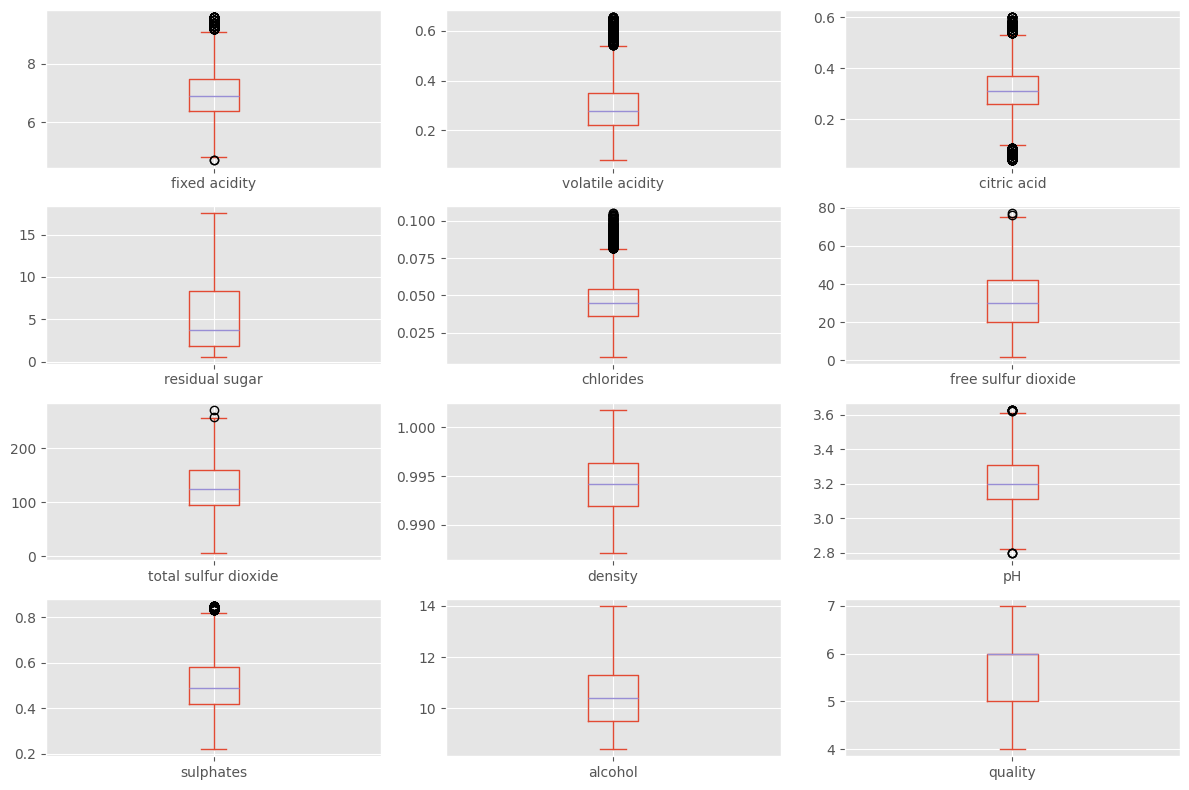

In [16]:
# Let's see how outliers disappear.
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [17]:
# Distribution of covariates
from scipy.stats import skew

# Asymmetry
skewness = df.select_dtypes(include='number').apply(skew)

# Sort variables by asymmetry
print(skewness.sort_values(ascending=False))

chlorides               1.047040
volatile acidity        1.016732
residual sugar          0.876416
sulphates               0.585375
alcohol                 0.505392
fixed acidity           0.483578
free sulfur dioxide     0.356516
pH                      0.168856
citric acid             0.063860
density                 0.019774
quality                -0.065243
total sulfur dioxide   -0.110691
dtype: float64


In [18]:
for col in df.columns[1:]: 
    # Calculate skewness
    sk = skew(df[col])
    if sk > 1: 
        df[col] = np.log1p(df[col])
    elif sk < -1:
        max_val = df[col].max()
        df[col] = np.log1p(max_val + 1 - df[col])

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11020\844715037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log1p(df[col])


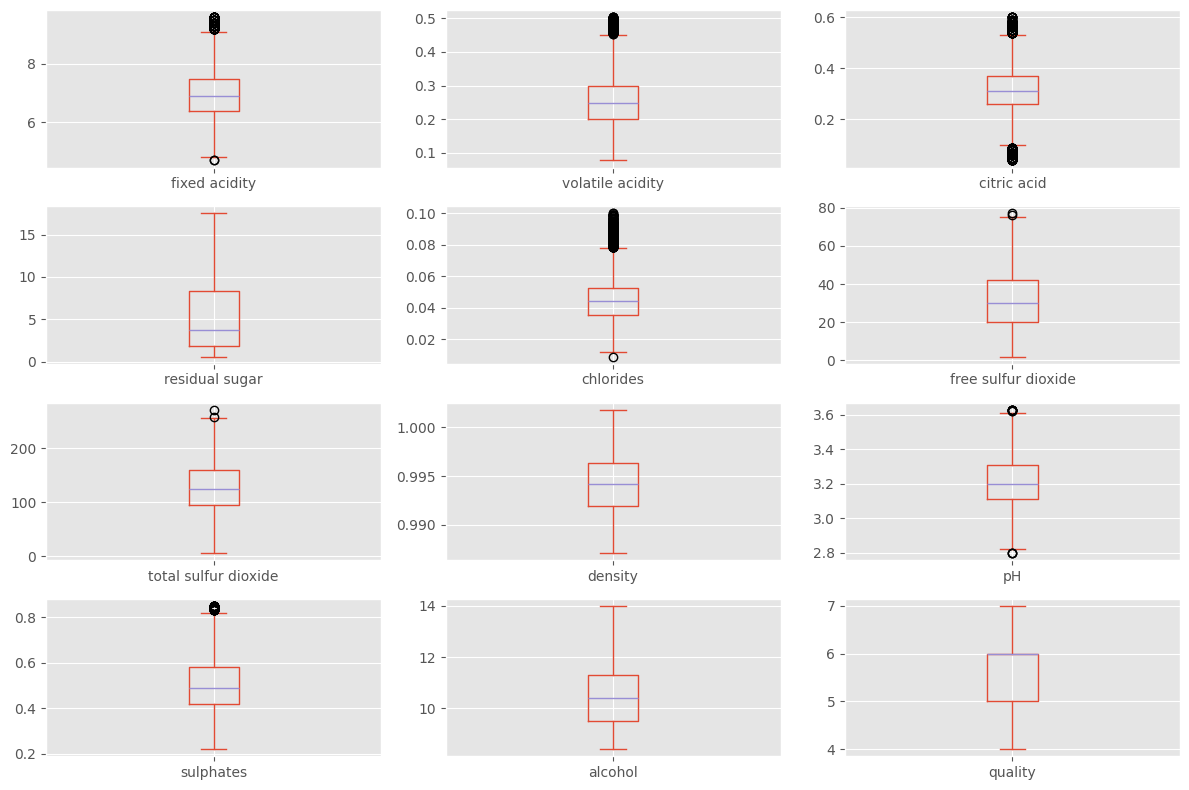

In [19]:
# We see that they have a more Gaussian shape.
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

4. 📊 Categorical variables

In [20]:
# One-Hot Encoding
wine_type = pd.get_dummies(df['type'], drop_first=True)
wine_type.mean()

white    0.858775
dtype: float64

In [21]:
df['type'].head()

1    white
2    white
3    white
4    white
5    white
Name: type, dtype: object

In [22]:
df['type'] = wine_type

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11020\1936698138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = wine_type


In [23]:
df['type'].head()

1    True
2    True
3    True
4    True
5    True
Name: type, dtype: bool

4.1 🛠️ Scaling of covariates

Let's scale all the numerical variables. Scaling variables is the process of transforming numerical values so that they are in the same range or scale.

Nótese que solo consideramos las variables numéricas. Para esto utilizamos df.iloc[:,1:], de forma que nos quedamos con las columnas a partir de la primera del dataset (i.e. ignoramos la variable type).


In [24]:
# # Import the library with the scaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Scaler
scaler = MinMaxScaler()

In [26]:
# We adjust the scaler with our continuous variables.
scaler.fit(df.iloc[:,1:])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [27]:
# We save the continuous variables already scaled
df.iloc[:,1:] = scaler.transform(df.iloc[:,1:])

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11020\4088546889.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.66666667 0.66666667 0.66666667 ... 0.66666667 0.33333333 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.transform(df.iloc[:,1:])


In [28]:
# We check that all variables are now on the same scale.
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,True,0.326531,0.434362,0.535714,0.059172,0.427764,0.160000,0.473684,0.468389,0.602410,0.428571,0.196429,0.666667
2,True,0.693878,0.398039,0.642857,0.372781,0.438248,0.373333,0.342105,0.543168,0.554217,0.349206,0.303571,0.666667
3,True,0.510204,0.304688,0.500000,0.467456,0.521761,0.600000,0.676692,0.577158,0.469880,0.285714,0.267857,0.666667
4,True,0.510204,0.304688,0.500000,0.467456,0.521761,0.600000,0.676692,0.577158,0.469880,0.285714,0.267857,0.666667
5,True,0.693878,0.398039,0.642857,0.372781,0.438248,0.373333,0.342105,0.543168,0.554217,0.349206,0.303571,0.666667


In [29]:
# The variable to be predicted with regression is between 0 and 1.
df['quality'].describe()

count    4815.000000
mean        0.606992
std         0.255199
min         0.000000
25%         0.333333
50%         0.666667
75%         0.666667
max         1.000000
Name: quality, dtype: float64

In [30]:
# Note that the variable we want to predict in the case of regression is between 0 and 1.
# # This does not matter in our case, but it is good to be clear about it.

X = df.drop(columns=['quality'])
y = df['quality']

5. 📉 Linear regression

5.1 This model finds the straight line that best fits the data, i.e., that minimizes the difference between the model's predictions and the actual values.

5.2 Let's divide our sample into train/test. We will train our models on the train set and then use the test set to evaluate the model's performance. This gives us a reasonable estimate of how our model will perform on data it has never seen before. Which is effectively the goal of any model.

In [31]:
# Imports
from sklearn.model_selection import train_test_split

In [32]:
# We define the response variable (y) and the covariates (X)
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [33]:
X_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2196,True,0.469388,0.285563,0.392857,0.029586,0.301172,0.240000,0.244361,0.210061,0.361446,0.253968,0.589286
2393,True,0.346939,0.187524,0.535714,0.053254,0.879859,0.546667,0.488722,0.454793,0.542169,0.428571,0.214286
6370,False,0.591837,0.522780,1.000000,0.118343,0.676661,0.280000,0.142857,0.642420,0.698795,0.904762,0.482143
1073,True,0.612245,0.505362,0.464286,0.437870,0.417270,0.306667,0.699248,0.543168,0.204819,0.396825,0.446429
2363,True,0.408163,0.323658,0.392857,0.710059,0.469640,0.560000,0.661654,0.741672,0.746988,0.317460,0.232143


5.3 🔧 Training the model
To train a linear regression model, we use the LinearRegression() function, which we adjust with the .fit() method on our training data.

In [34]:
# Imports 
from sklearn.linear_model import LinearRegression

In [35]:
# We create the model
lm=LinearRegression()

In [36]:
# We train the model on our training sample.
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


5.4 ✅ Model evaluation
Let's evaluate the model to see if the estimates make sense and if we can interpret the results.

In [37]:
# Intercept of the regression model
lm.intercept_

np.float64(0.7725916127770516)

In [38]:
# Covariate parameters
lm.coef_

array([-0.1829949 ,  0.15696143, -0.30072852,  0.00202605,  0.4719677 ,
       -0.05116196,  0.12970028, -0.07658236, -0.75038218,  0.19721183,
        0.17479914,  0.25628418])

In [39]:
# Model coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
type,-0.182995
fixed acidity,0.156961
volatile acidity,-0.300729
citric acid,0.002026
residual sugar,0.471968
chlorides,-0.051162
free sulfur dioxide,0.129700
total sulfur dioxide,-0.076582
density,-0.750382
pH,0.197212


5.5 💡 Model Interpretation:
Keeping all other variables constant:
- A one-unit increase in residual sugar corresponds to an approximate 0.47 rise in wine quality.
- A one-unit increase in density leads to a roughly 0.75 decrease in wine quality.
In essence, density has a notably negative impact on wine quality, whereas residual sugar appears to enhance it.


5.6 🚀 Predictions with our model

In [40]:
predictions = lm.predict(X_Test)

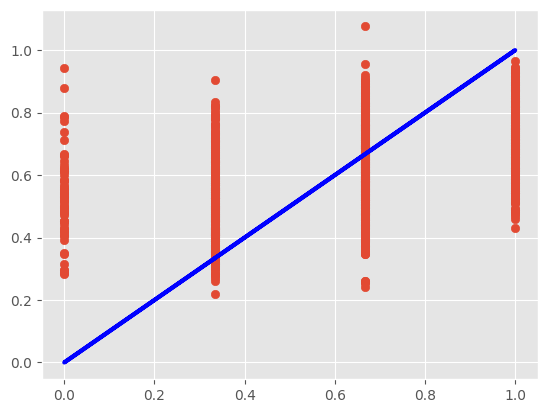

In [41]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'b-', linewidth=3)

5.7 📊 Visualization Insight:
We've plotted the actual values of the target variable quality against the predicted values from our model. Overlaid on the plot is a diagonal line representing perfect predictions—where the predicted values exactly match the real ones.
Given that quality is an ordinal integer variable, the model struggles to perform accurately. The blue diagonal serves as a benchmark for ideal predictions: the closer the data points fall to this line, the better the model's performance. Deviations from this line indicate increasing prediction errors.
This plot offers useful visual insight into whether the model truly captures linear relationships. Since this is just an introductory notebook, we won’t dive deeper for now.


C:\Users\Nikol\AppData\Local\Temp\ipykernel_11020\4217083911.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=25);


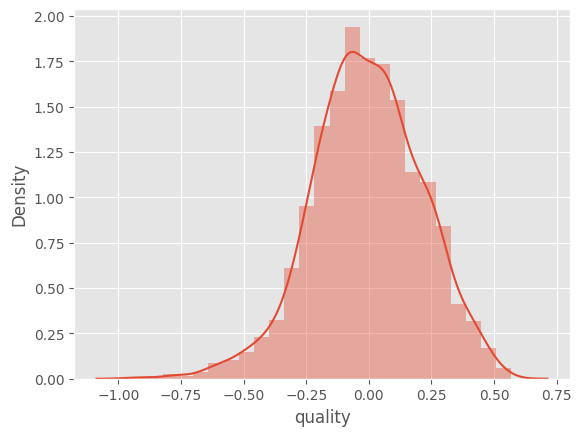

In [42]:
# Residual histograms

sns.distplot((y_test-predictions),bins=25);

6. ✅ Evaluation metrics
MAE is the easiest to understand because it represents the average error.
MSE is more popular than MAE because MSE “punishes” large errors more, which is often useful in real-world problems.
RMSE is even more popular than MSE because RMSE is interpreted in the same units as the target variable (“y”).
All of these are loss functions because we want to minimize them.

In [43]:
# Imports 
from sklearn import metrics

In [44]:
# Results of different metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17320787485750425
MSE: 0.04774820466696678
RMSE 0.2185136258153408


7. 🎯 Logistic regression 

Despite its name, logistic regression is a supervised machine learning algorithm used for classification tasks rather than regression.
Its primary goal is to estimate the probability that a given observation belongs to a specific category—in this case, whether a wine is classified as white or red.
Would you like me to add a visual analogy or an example to reinforce how the model works in this context?


In [45]:
# Imports
from sklearn.model_selection import train_test_split

In [46]:
# We build the train/test arrays of X and y
X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1), df['type'], test_size=0.30,random_state=101)

In [47]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2106,0.775510,0.323658,0.767857,0.863905,0.511357,0.506667,0.857143,0.910265,0.265060,0.698413,0.107143,0.333333
1692,0.469388,0.323658,0.464286,0.213018,0.332957,0.520000,0.778195,0.380014,0.578313,0.428571,0.607143,0.666667
4987,0.469388,0.949923,0.071429,0.071006,0.707381,0.080000,0.067669,0.726717,0.819277,0.492063,0.107143,0.333333
5101,0.469388,0.641214,0.553571,0.059172,0.829410,0.186667,0.124060,0.611149,0.650602,0.523810,0.142857,0.333333
2456,0.693878,0.487813,0.571429,0.402367,0.301172,0.453333,0.563910,0.598912,0.469880,0.507937,0.392857,0.666667


7.1 🔧 Model training and prediction

In [48]:
# Imports 
from sklearn.linear_model import LogisticRegression


In [49]:
# We build the train/test arrays of X and y

logmodel = LogisticRegression()

In [50]:
# We train the model on our training sample.
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


7.2 🎯 Predictions with our model

In [51]:
predictions = logmodel.predict(X_test)

7.3 📝 Evaluation

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       200
        True       1.00      1.00      1.00      1245

    accuracy                           0.99      1445
   macro avg       0.99      0.99      0.99      1445
weighted avg       0.99      0.99      0.99      1445

[[ 195    5]
 [   3 1242]]


8. 📈 Model Performance Summary:
Our model achieves consistently high scores across all evaluation metrics, reflecting strong overall performance. This demonstrates that effective results don't always require overly complex algorithms—sometimes, simplicity does the job just fine. 🎯
